#EDA 1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
mean_ex_showroom_price = df["ex_showroom_price"].mean()

In [13]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
index = pd.Index(range(1, len(df)+1))
df.index = index
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
2,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
3,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
4,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
5,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
618,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
619,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
620,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
621,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


1. Range of selling prices:
   Min: ₹6,000, Max: ₹760,000



2. Median selling price:
   ₹45,000.0



3. Most common seller type:
   Individual



4. Bikes >50,000 km: 86



5. Average km_driven by owner:
owner
1st owner    32858.0
2nd owner    29809.0
3rd owner    30905.0
4th owner     6500.0
Name: km_driven, dtype: float64



6. Proportion of 2015-or-older bikes: 52.7%



7. Missing values per column:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
age                  0
dtype: int64



8. Highest ex-showroom: ₹1,278,000.0 (Harley-Davidson Street Bob)



9. Bikes per seller type:
seller_type
Individual    619
Dealer          3
Name: count, dtype: int64



10.



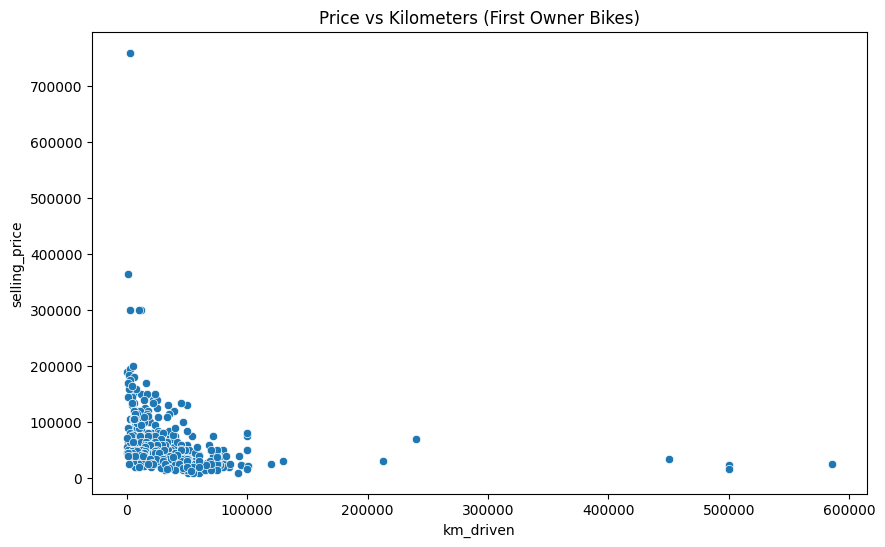




11. Outliers removed: 22 bikes



12.



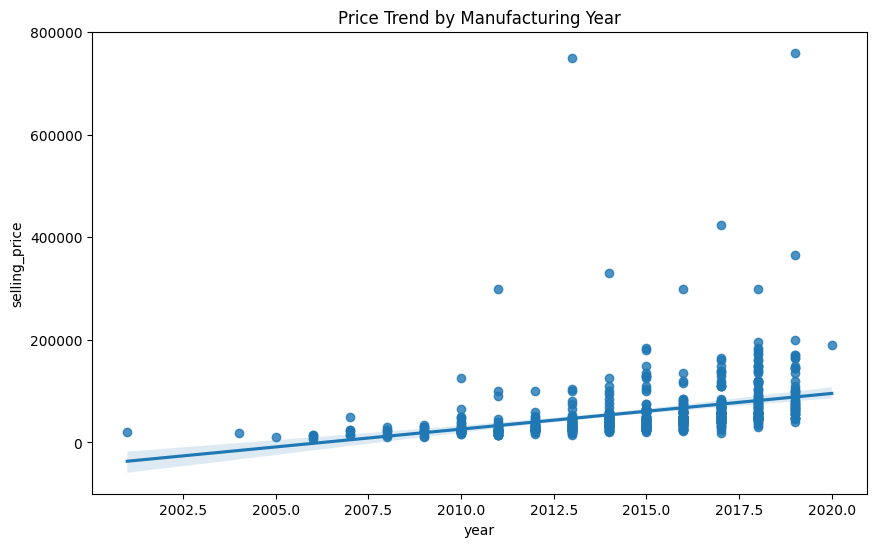




13. Average annual depreciation rate:
age
6    -0.415132
7    -0.209560
8    -0.196976
9    -0.240138
10    0.017772
11   -0.093437
12    0.059475
13   -0.373777
14    0.121223
15   -0.116456
16   -0.304221
17   -0.121331
18    0.257249
19   -0.539693
20   -0.130435
21    0.800000
24    0.111111
Name: selling_price, dtype: float64



14. Bikes priced >30% above year average:
                                    name  year  selling_price
0    Royal Enfield Classic Gunmetal Grey  2018         150000
8                          Yamaha YZF R3  2019         365000
11   Royal Enfield Classic Gunmetal Grey  2018         150000
12                           Yamaha FZ25  2018         120000
24                        Honda CBR-250R  2016         120000
..                                   ...   ...            ...
544            Royal Enfield Classic 350  2015         100000
545            Royal Enfield Classic 500  2014          95000
546            Royal Enfield Classic 500  2011          90000

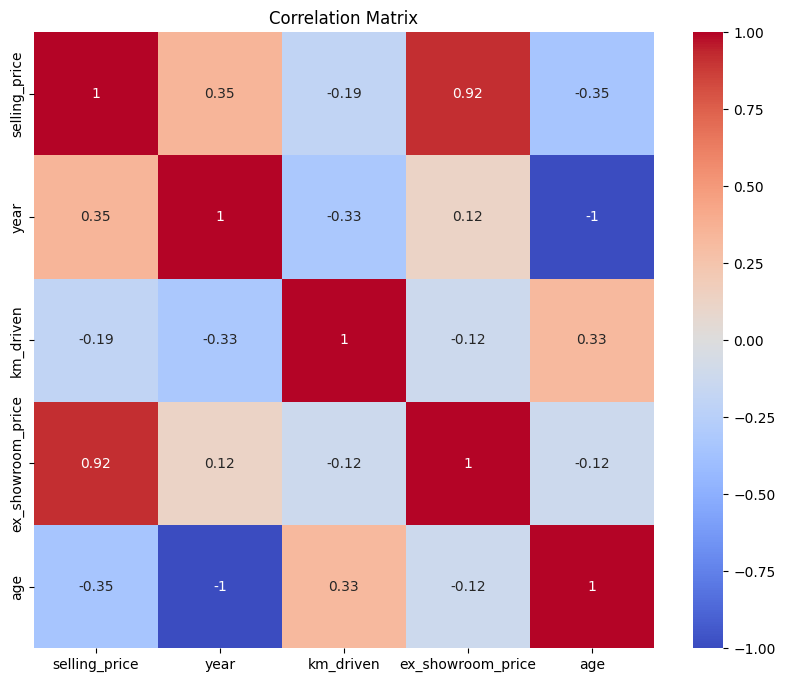

In [23]:
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# ---------------------------
# Question 1: Price Range
# ---------------------------
print("1. Range of selling prices:")
print(f"   Min: ₹{df['selling_price'].min():,}, Max: ₹{df['selling_price'].max():,}")

# ---------------------------
# Question 2: Median Price
# ---------------------------
print("\n\n\n2. Median selling price:")
print(f"   ₹{df['selling_price'].median():,}")

# ---------------------------
# Question 3: Common Seller
# ---------------------------
print("\n\n\n3. Most common seller type:")
print(f"   {df['seller_type'].mode()[0]}")

# ---------------------------
# Question 4: High Mileage Bikes
# ---------------------------
high_km = df[df['km_driven'] > 50000].shape[0]
print(f"\n\n\n4. Bikes >50,000 km: {high_km}")

# ---------------------------
# Question 5: KM by Ownership
# ---------------------------
print("\n\n\n5. Average km_driven by owner:")
print(df.groupby('owner')['km_driven'].mean().round(0))

# ---------------------------
# Question 6: Older Bikes
# ---------------------------
old_bikes = df[df['year'] <= 2015].shape[0]
print(f"\n\n\n6. Proportion of 2015-or-older bikes: {old_bikes/len(df):.1%}")

# ---------------------------
# Question 7: Missing Values
# ---------------------------
print("\n\n\n7. Missing values per column:")
print(df.isnull().sum())

# ---------------------------
# Question 8: Max Ex-Showroom
# ---------------------------
max_ex = df['ex_showroom_price'].max()
bike = df.loc[df['ex_showroom_price'] == max_ex, 'name'].values[0]
print(f"\n\n\n8. Highest ex-showroom: ₹{max_ex:,} ({bike})")

# ---------------------------
# Question 9: Seller Counts
# ---------------------------
print("\n\n\n9. Bikes per seller type:")
print(df['seller_type'].value_counts())

# ---------------------------
# Question 10: Price-KM Relationship
# ---------------------------
print("\n\n\n10.\n")
first_owner = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner)
plt.title("Price vs Kilometers (First Owner Bikes)")
plt.show()

# ---------------------------
# Question 11: Remove Outliers
# ---------------------------
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]
print(f"\n\n\n11. Outliers removed: {len(df)-len(df_clean)} bikes")

# ---------------------------
# Question 12: Year-Price Analysis
# ---------------------------
print("\n\n\n12.\n")
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='selling_price', data=df)
plt.title("Price Trend by Manufacturing Year")
plt.show()

# ---------------------------
# Question 13: Depreciation
# ---------------------------
current_year = 2025
df['age'] = current_year - df['year']
depreciation = df.groupby('age')['selling_price'].mean().pct_change().dropna()
print("\n\n\n13. Average annual depreciation rate:")
print(depreciation)

# ---------------------------
# Question 14: Overpriced Bikes
# ---------------------------
year_avg = df.groupby('year')['selling_price'].mean().reset_index()
df_merged = df.merge(year_avg, on='year', suffixes=('', '_avg'))
df_merged['price_diff'] = df_merged['selling_price'] - df_merged['selling_price_avg']
overpriced = df_merged[df_merged['price_diff'] > 0.3*df_merged['selling_price_avg']]
print("\n\n\n14. Bikes priced >30% above year average:")
print(overpriced[['name', 'year', 'selling_price']])

# ---------------------------
# Question 15: Correlation Matrix
# ---------------------------
print("\n\n\n15.\n")
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#EDA 2


1. Average Price by Dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.56205

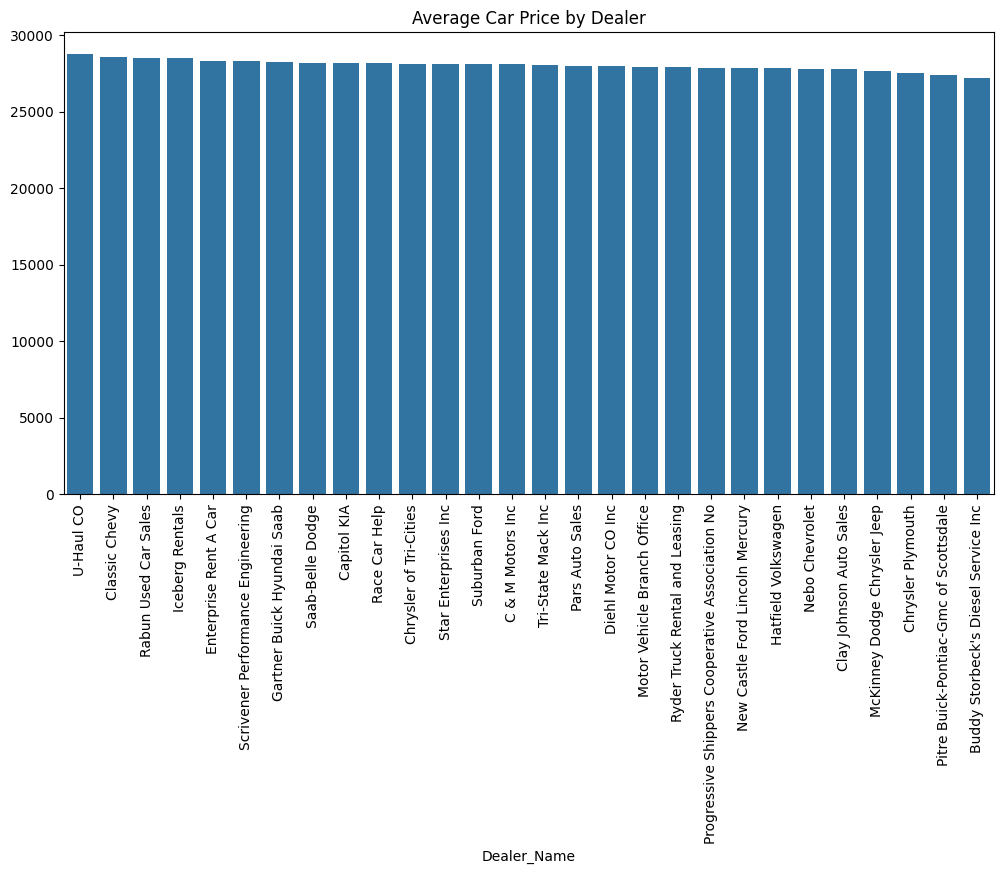




2. Brand with Highest Price Variation: Lincoln (σ: $19658.05)



3.


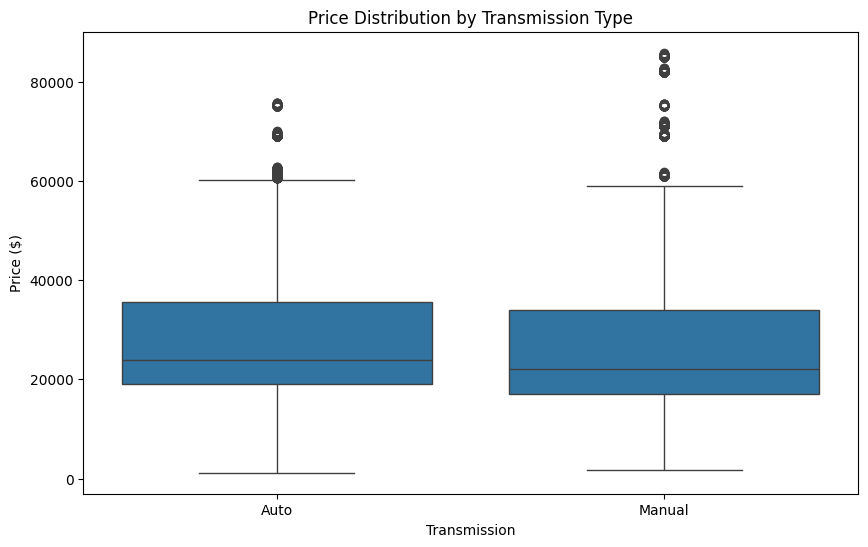




4.


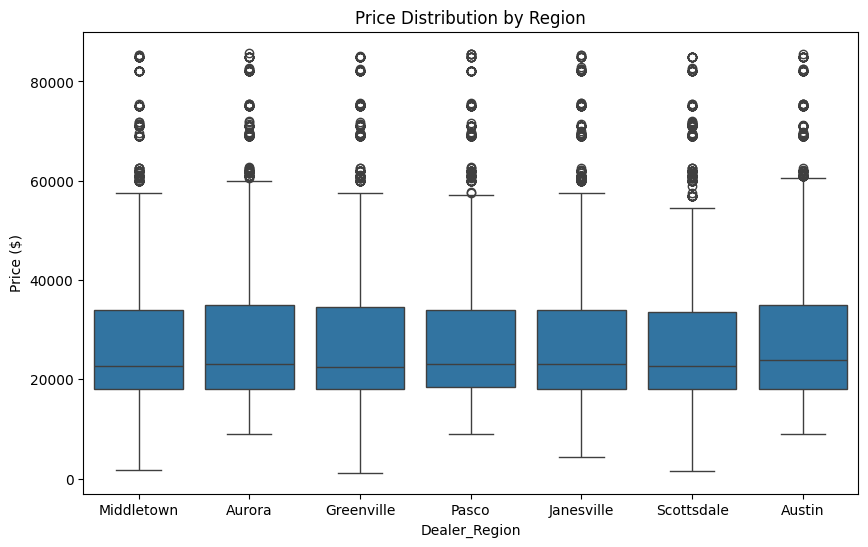




5.


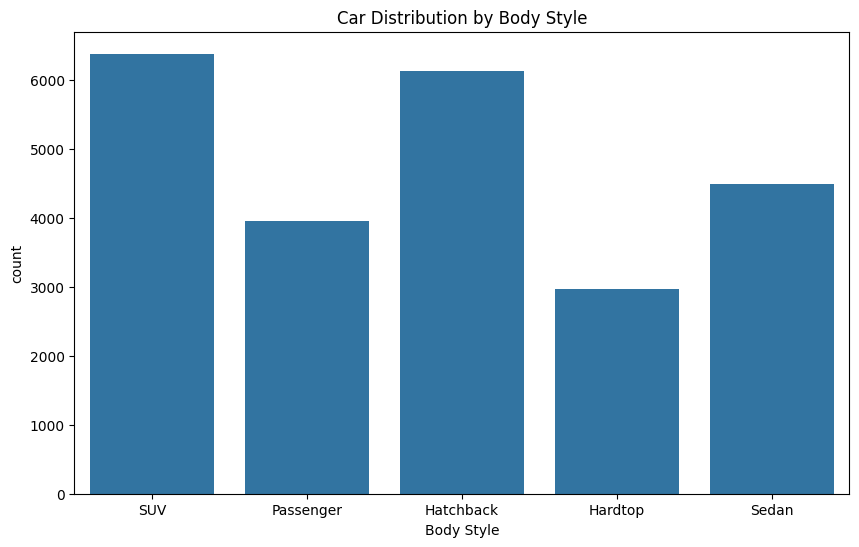




6.


<ipython-input-3-4c4a3dd4b694>:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack(),


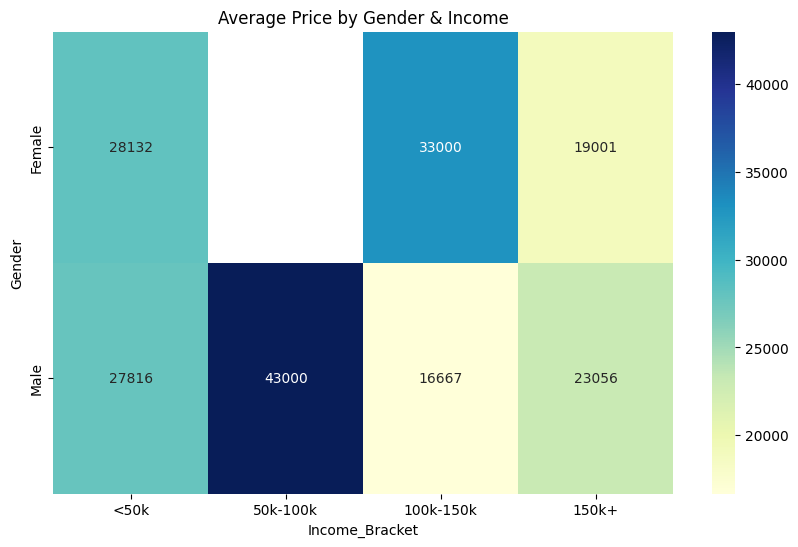




7.


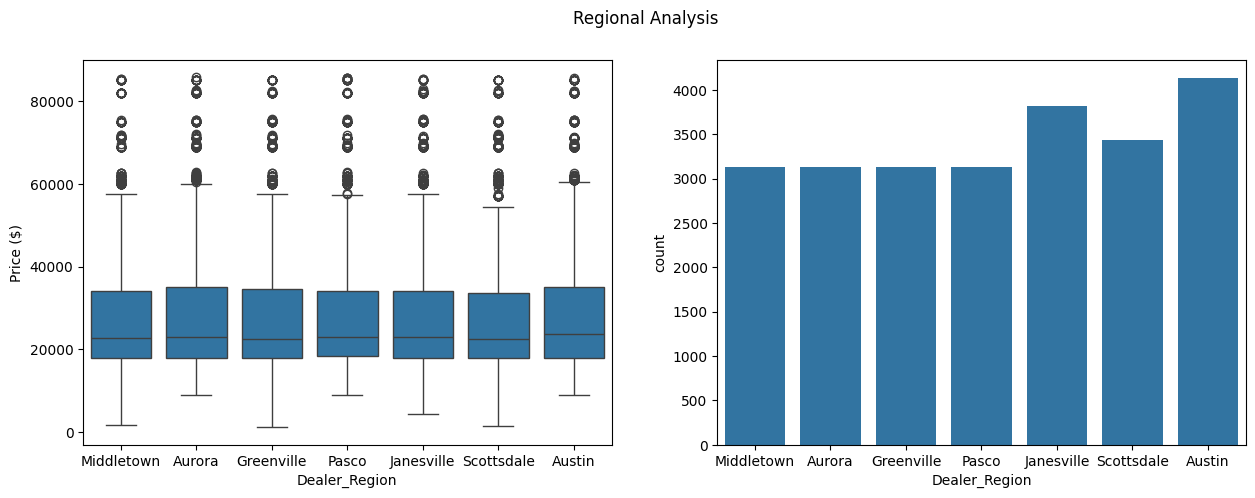




8.


<ipython-input-3-4c4a3dd4b694>:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Engine', y='Price ($)', data=df, ci=None)


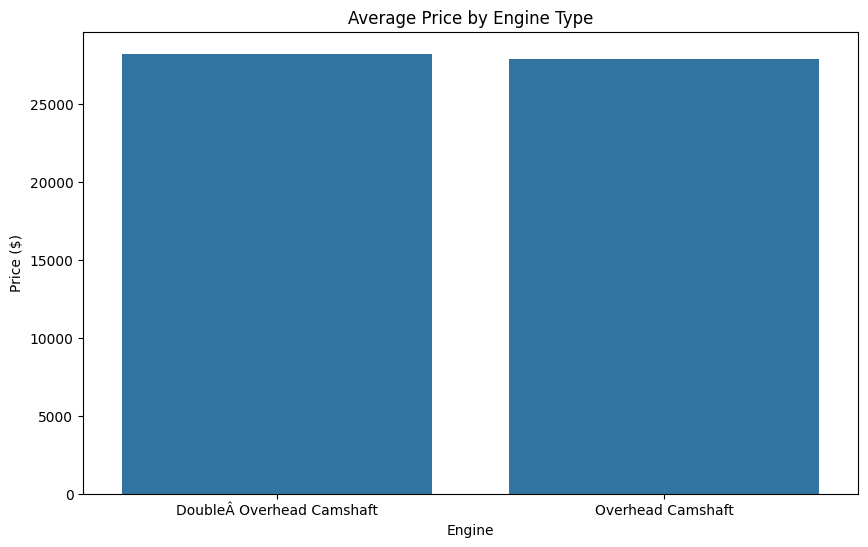




9.


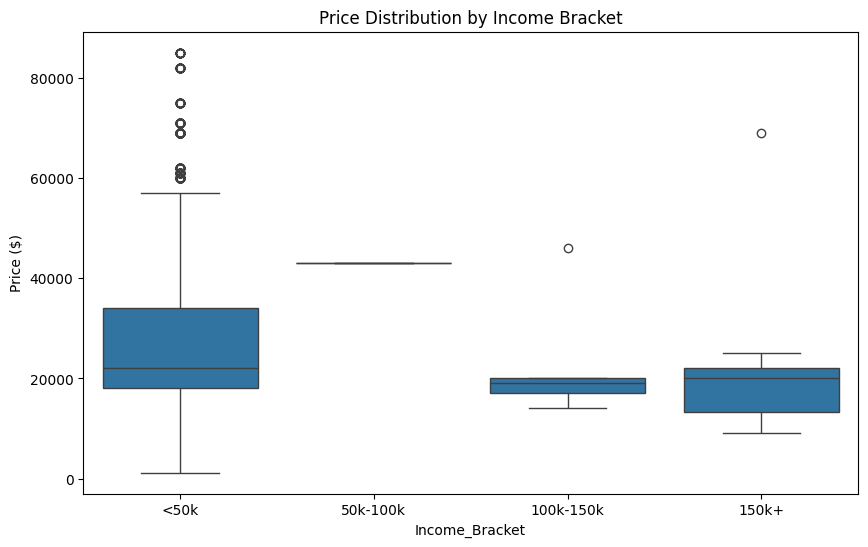




10.


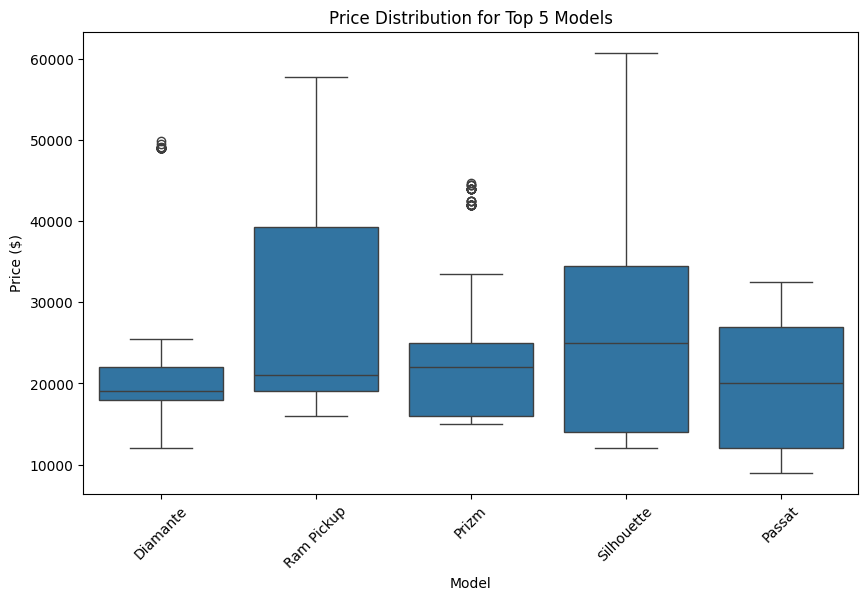




11.


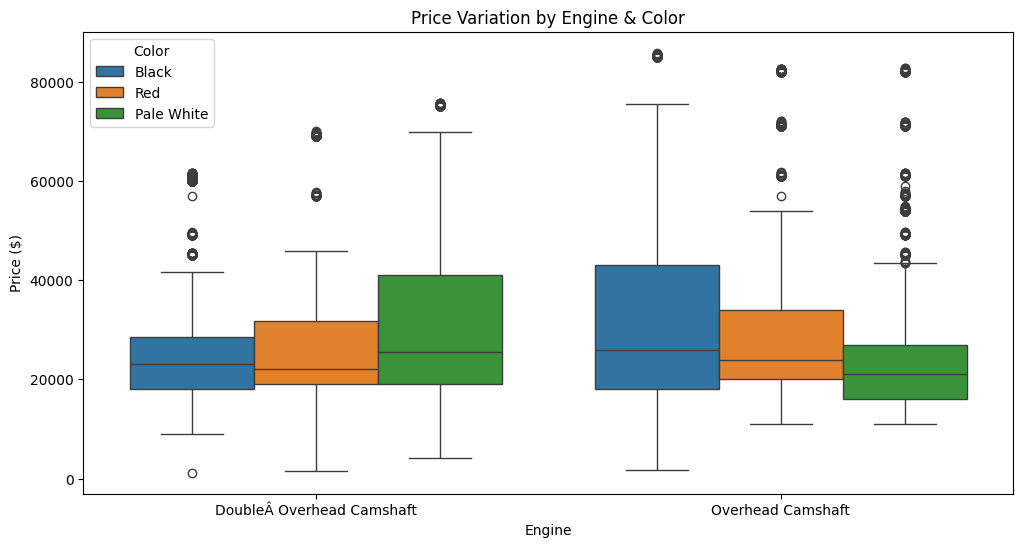




12.


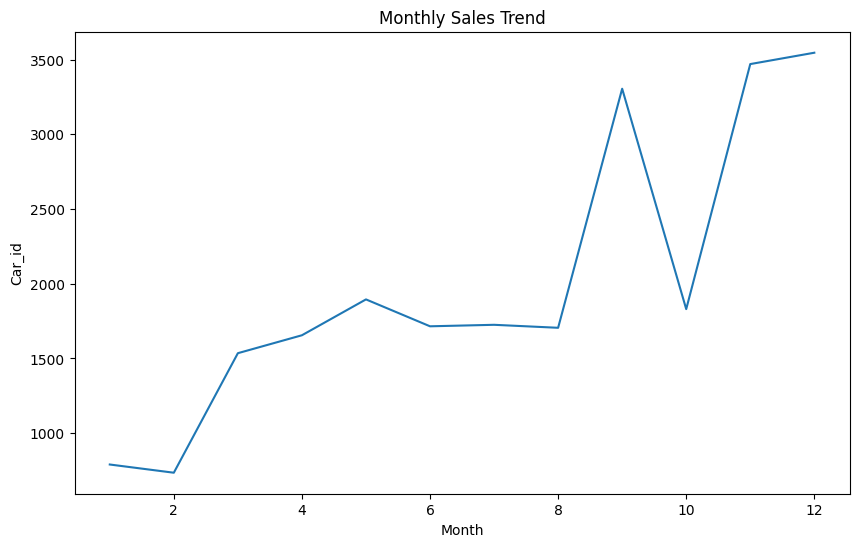




13.


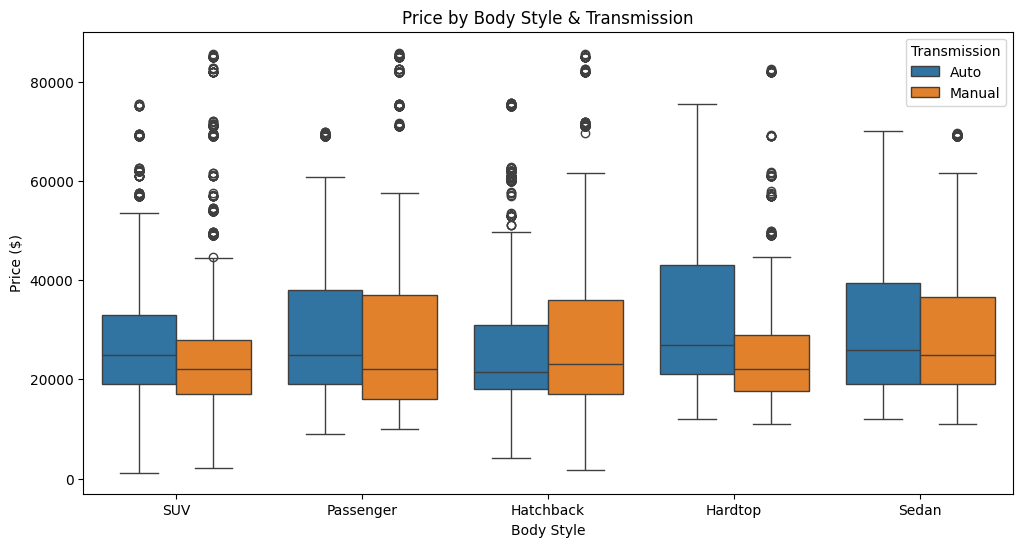




14.


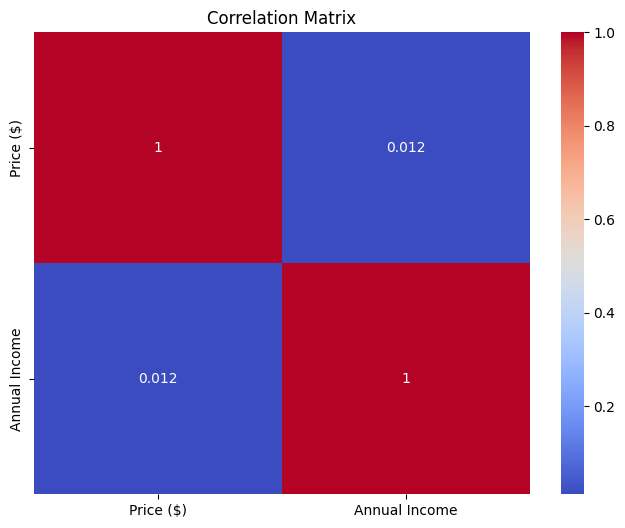




15.


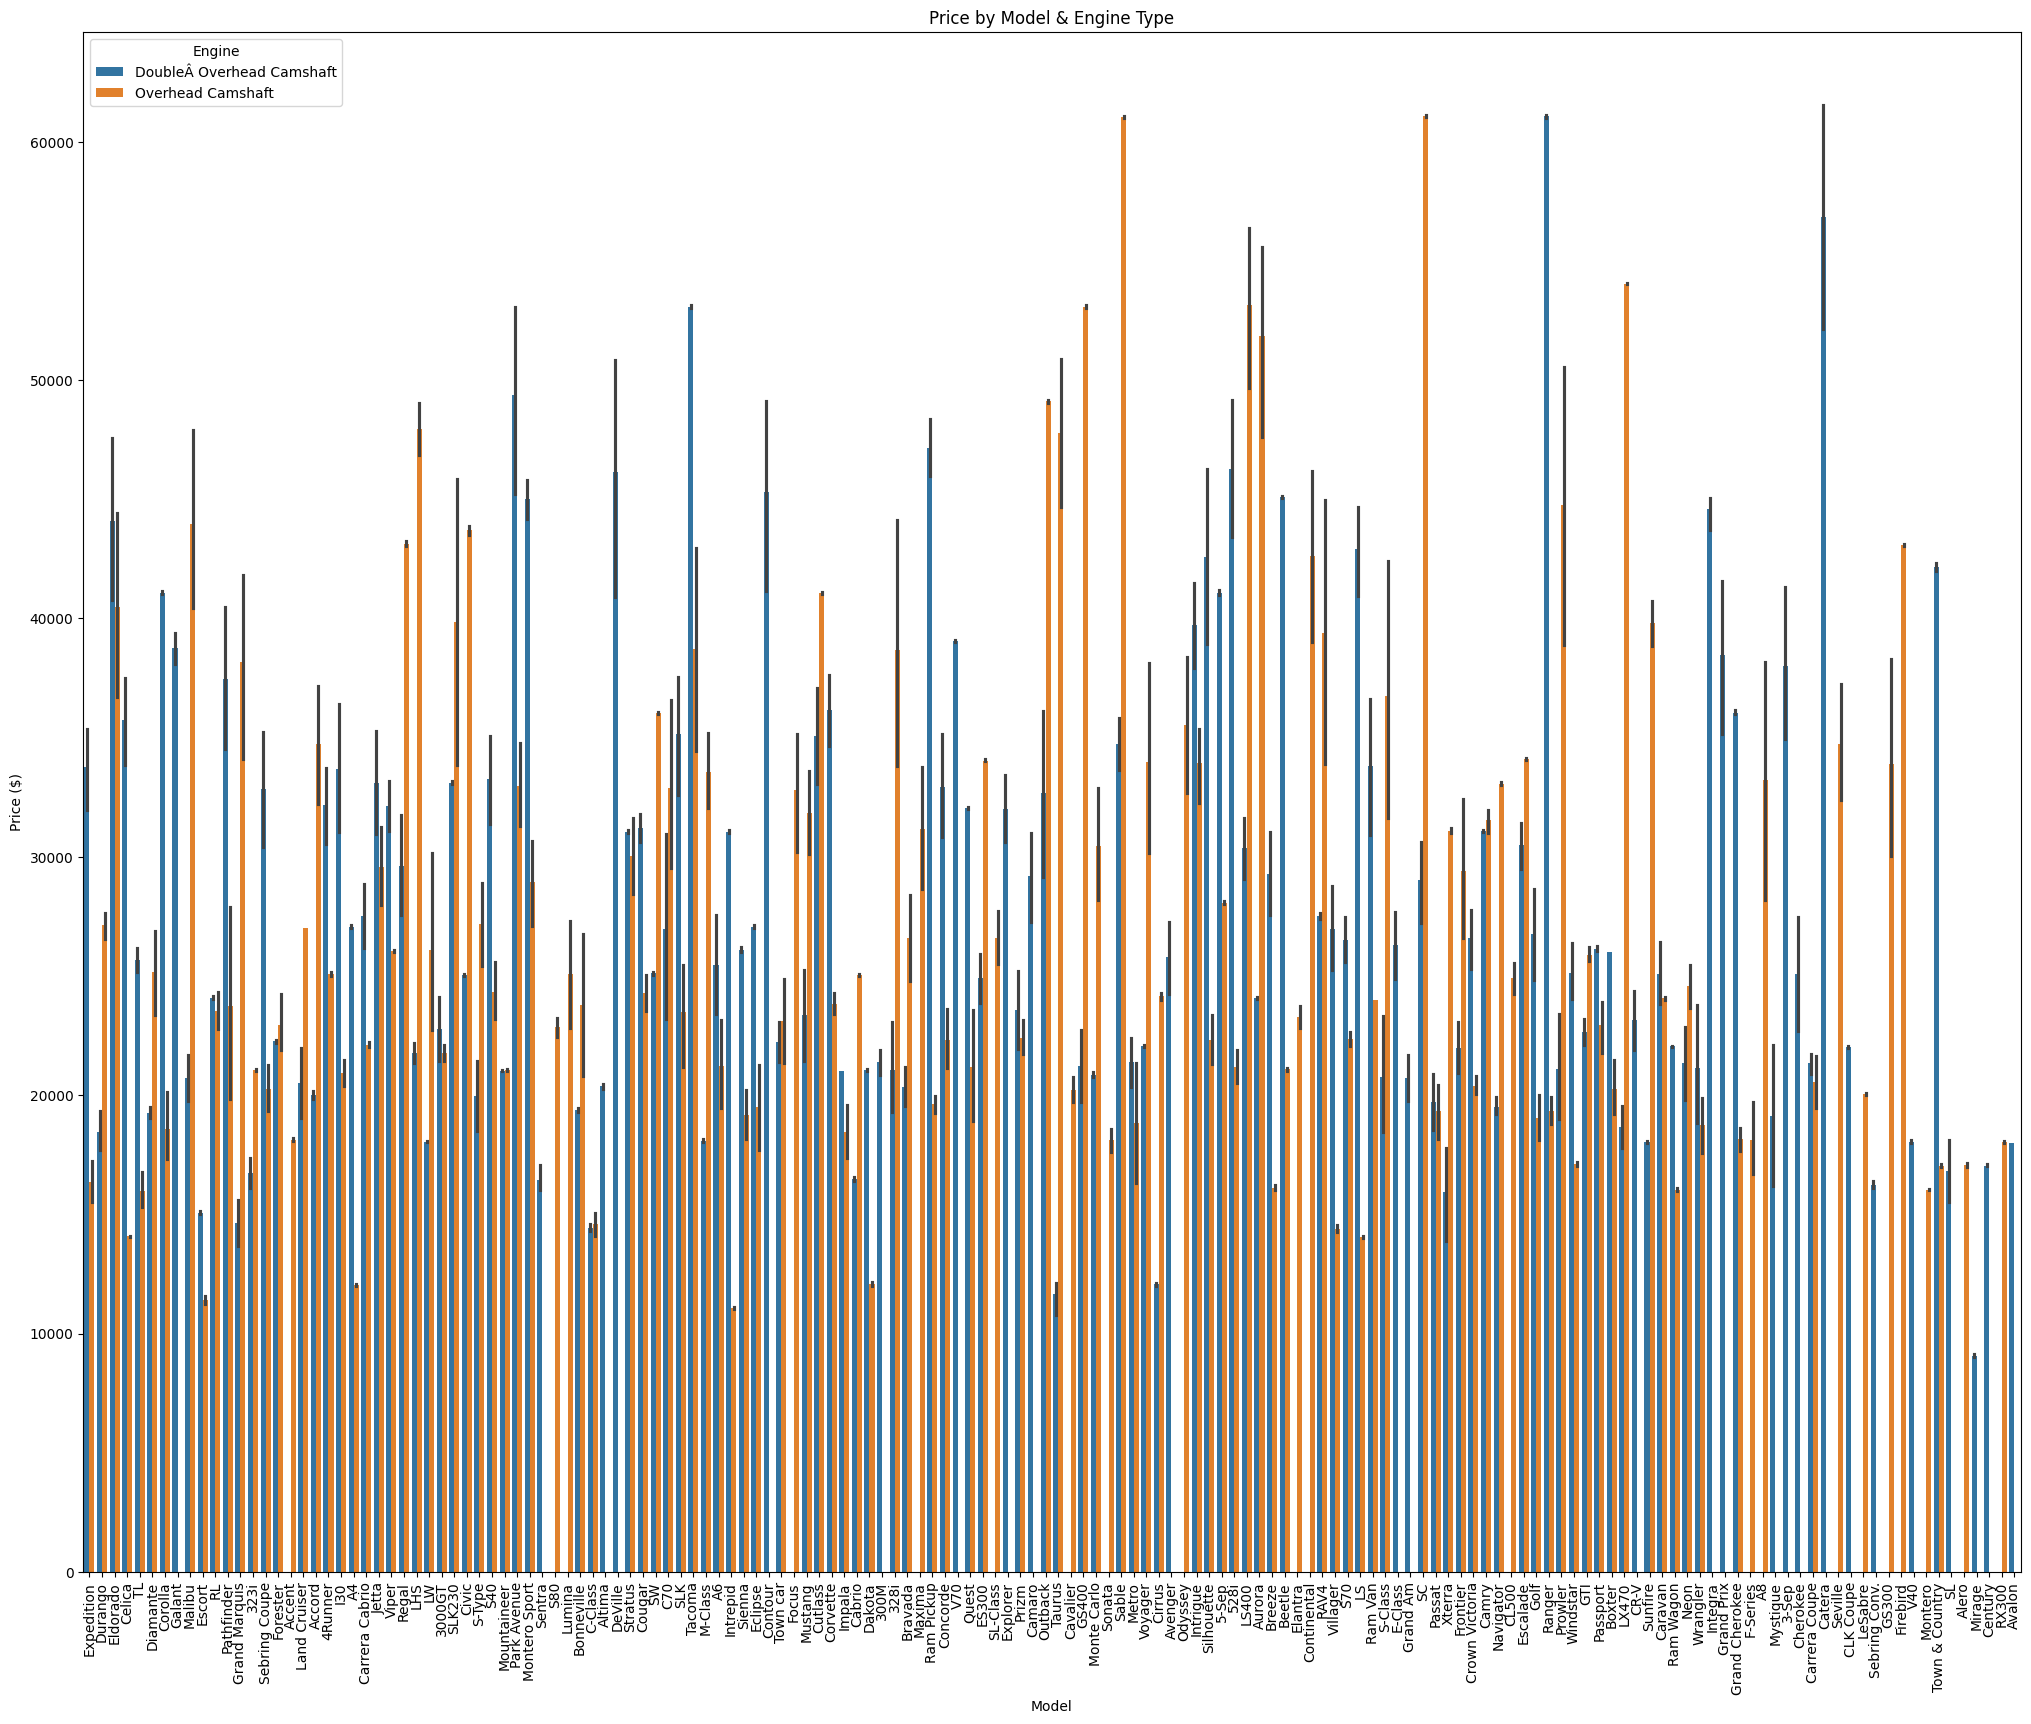

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")

# --------------------------------------------
# Question 1: Average Price by Dealer
# --------------------------------------------
avg_price_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("\n1. Average Price by Dealer:\n", avg_price_dealer)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_dealer.index, y=avg_price_dealer.values)
plt.xticks(rotation=90)
plt.title("Average Car Price by Dealer")
plt.show()

# --------------------------------------------
# Question 2: Brand with Highest Price Variation
# --------------------------------------------
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(f"\n\n\n2. Brand with Highest Price Variation: {price_variation.idxmax()} (σ: ${price_variation.max():.2f})")

# --------------------------------------------
# Question 3: Price Distribution by Transmission (IQR)
# --------------------------------------------
print("\n\n\n3.")
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title("Price Distribution by Transmission Type")
plt.show()

# --------------------------------------------
# Question 4: Price Distribution by Region
# --------------------------------------------
print("\n\n\n4.")
plt.figure(figsize=(10,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title("Price Distribution by Region")
plt.show()

# --------------------------------------------
# Question 5: Car Distribution by Body Style
# --------------------------------------------
print("\n\n\n5.")
plt.figure(figsize=(10,6))
sns.countplot(x='Body Style', data=df)
plt.title("Car Distribution by Body Style")
plt.show()

# --------------------------------------------
# Question 6: Price by Gender & Income
# --------------------------------------------
print("\n\n\n6.")
df['Income_Bracket'] = pd.cut(df['Annual Income'],
                             bins=[0, 50000, 100000, 150000, 200000],
                             labels=['<50k', '50k-100k', '100k-150k', '150k+'])
plt.figure(figsize=(10,6))
sns.heatmap(df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack(),
            annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Gender & Income")
plt.show()

# --------------------------------------------
# Question 7: Regional Sales & Prices
# --------------------------------------------
print("\n\n\n7.")
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, ax=ax[0])
sns.countplot(x='Dealer_Region', data=df, ax=ax[1])
plt.suptitle("Regional Analysis")
plt.show()

# --------------------------------------------
# Question 8: Price by Engine Size
# --------------------------------------------
print("\n\n\n8.")
plt.figure(figsize=(10,6))
sns.barplot(x='Engine', y='Price ($)', data=df, ci=None)
plt.title("Average Price by Engine Type")
plt.show()

# --------------------------------------------
# Question 9: Price by Income Bracket
# --------------------------------------------
print("\n\n\n9.")
plt.figure(figsize=(10,6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title("Price Distribution by Income Bracket")
plt.show()

# --------------------------------------------
# Question 10: Top 5 Models by Sales
# --------------------------------------------
print("\n\n\n10.")
top_models = df['Model'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
plt.title("Price Distribution for Top 5 Models")
plt.xticks(rotation=45)
plt.show()

# --------------------------------------------
# Question 11: Price by Engine & Color
# --------------------------------------------
print("\n\n\n11.")
plt.figure(figsize=(12,6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title("Price Variation by Engine & Color")
plt.show()

# --------------------------------------------
# Question 12: Seasonal Sales Trend
# --------------------------------------------
print("\n\n\n12.")
df['Month'] = pd.to_datetime(df['Date']).dt.month
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Car_id', data=df.groupby('Month')['Car_id'].count().reset_index())
plt.title("Monthly Sales Trend")
plt.show()

# --------------------------------------------
# Question 13: Price by Body Style & Transmission
# --------------------------------------------
print("\n\n\n13.")
plt.figure(figsize=(12,6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title("Price by Body Style & Transmission")
plt.show()

# --------------------------------------------
# Question 14: Correlation Analysis
# --------------------------------------------
print("\n\n\n14.")
plt.figure(figsize=(8,6))
sns.heatmap(df[['Price ($)', 'Annual Income']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# --------------------------------------------
# Question 15: Price by Model & Engine
# --------------------------------------------
print("\n\n\n15.")
plt.figure(figsize=(25,20))
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=df)
plt.xticks(rotation=90)
plt.title("Price by Model & Engine Type")
plt.show()

#EDA 3

In [16]:
df=pd.read_csv("amazon.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
index = pd.Index(range(1, len(df)+1))
df.index = index
df
df.dtypes
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
2,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
3,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
4,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
5,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [17]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('[^\d.]', '', regex=True), errors='coerce')

df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('[^\d.]', '', regex=True), errors='coerce')

df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', '', regex=False), errors='coerce')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', '', regex=False), errors='coerce')

df


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
2,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
3,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
4,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
5,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1460,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.medi


1. Average rating per category:
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|

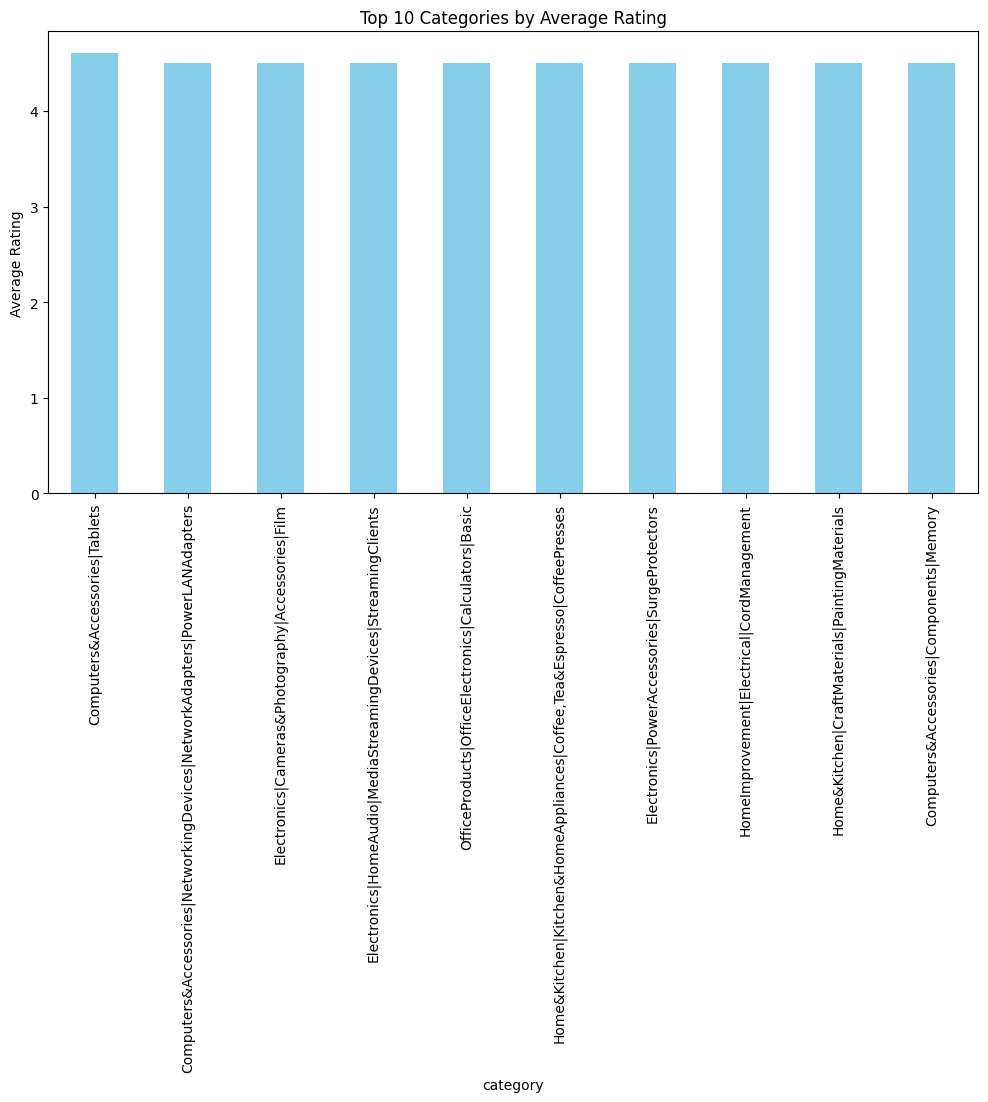




2. Top products by rating count in each category:
                                               category  \
1156  Car&Motorbike|CarAccessories|InteriorAccessori...   
694   Computers&Accessories|Accessories&Peripherals|...   
905   Computers&Accessories|Accessories&Peripherals|...   
747   Computers&Accessories|Accessories&Peripherals|...   
843   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
615   OfficeProducts|OfficePaperProducts|Paper|Stati...   
992   OfficeProducts|OfficePaperProducts|Paper|Stati...   
764   OfficeProducts|OfficePaperProducts|Paper|Stati...   
849   OfficeProducts|OfficePaperProducts|Paper|Stati...   
923   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1156  Reffair AX30 [MAX] Portable Air Purifier for C...          1118  
694   rts [2 Pack] Mini USB C Type C Adapter Plug, T...          4426  
905   Hp Wired On Ear 

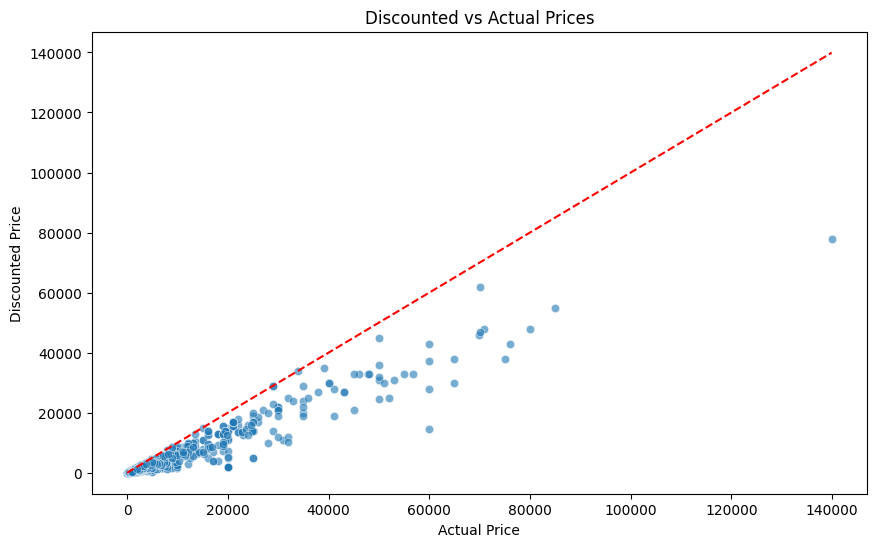




4. Average discount percentage by category:
category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandM

In [20]:
# ----------------------------
# Question 1: Average rating per category
# ----------------------------
print("\n1. Average rating per category:")
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating)

# Visualization
plt.figure(figsize=(12,6))
avg_rating.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Average Rating')
plt.ylabel('Average Rating')
plt.show()

# ----------------------------
# Question 2: Top rating_count products by category
# ----------------------------
top_products = df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]
print("\n\n\n2. Top products by rating count in each category:")
print(top_products)

# ----------------------------
# Question 3: Price distribution analysis
# ----------------------------
print("\n\n\n3.")
plt.figure(figsize=(10,6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df, alpha=0.6)
plt.plot([0, df['actual_price'].max()], [0, df['actual_price'].max()], 'r--')
plt.title('Discounted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

# ----------------------------
# Question 4: Average discount percentage by category
# ----------------------------
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\n\n\n4. Average discount percentage by category:")
print(avg_discount)

# ----------------------------
# Question 5: Most popular product names
# ----------------------------
popular_products = df.sort_values('rating_count', ascending=False)[['product_name', 'rating_count']].head(10)
print("\n\n\n5. Top 10 popular products:")
print(popular_products)

# ----------------------------
# Question 6: Most popular product keywords
# ----------------------------
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Extract keywords from product names
all_words = ' '.join(df['product_name']).lower().split()
filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]
word_freq = Counter(filtered_words)

print("\n\n\n6. Top 10 product keywords:")
print(word_freq.most_common(10))

# ----------------------------
# Question 7: Most popular product reviews
# ----------------------------
# Analyze review titles
review_words = ' '.join(df['review_title'].dropna()).lower().split()
filtered_review_words = [word for word in review_words if word not in stop_words and len(word) > 2]
review_word_freq = Counter(filtered_review_words)

print("\n\n\n7. Top 10 review keywords:")
print(review_word_freq.most_common(10))

# ----------------------------
# Question 8: Price-Rating correlation
# ----------------------------
correlation = df[['discounted_price', 'rating']].corr().iloc[0,1]
print(f"\n\n\n8. Correlation between discounted price and rating: {correlation:.2f}")

# ----------------------------
# Question 9: Top 5 categories by highest ratings
# ----------------------------
top_categories = avg_rating.head(5)
print("\n\n\n9. Top 5 categories by ratings:")
print(top_categories)

# ----------------------------
# Question 10: Areas for improvement
# ----------------------------
# Identify low-rated categories
low_rated = avg_rating[avg_rating < 3.5].sort_values()
print("\n\n\n10. Potential improvement areas:")
print(f"Low-rated categories needing improvement:\n{low_rated}")

# High discount-low sales products
high_discount_low_rating = df[(df['discount_percentage'] > 50) & (df['rating'] < 3.5)]
print(f"\nHigh-discount (>50%) but low-rated (<3.5) products:\n{high_discount_low_rating[['product_name', 'discount_percentage', 'rating']]}")

#EDA 4

In [29]:
df=pd.read_csv("spotify.csv")
df.isna().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [30]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
435,True
436,False
437,False
438,False


In [32]:
# ----------------------------
# Question 1: Dropping duplicate and null values
# ----------------------------
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
433,False
434,False
436,False
437,False





2.


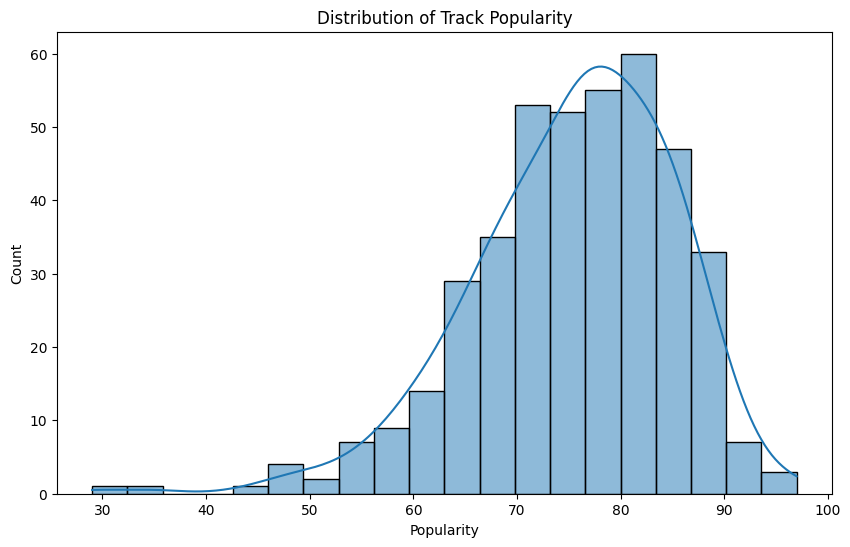




3.


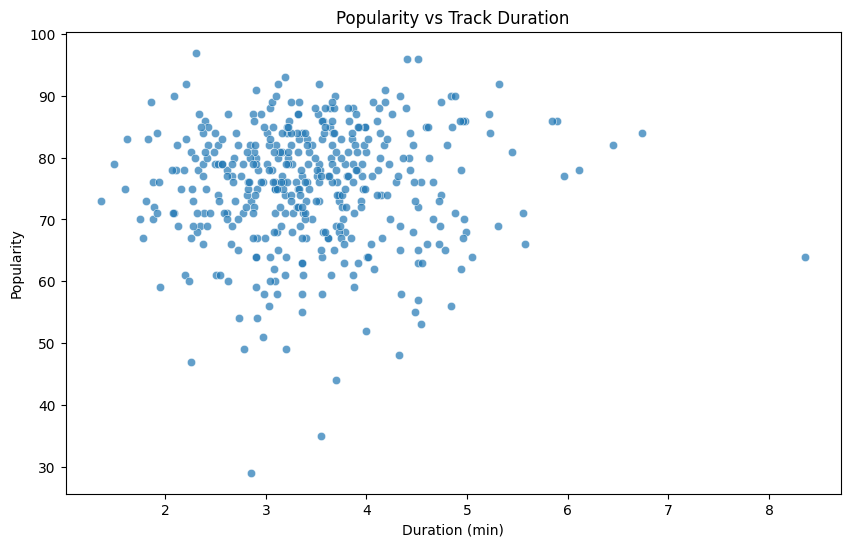




4.


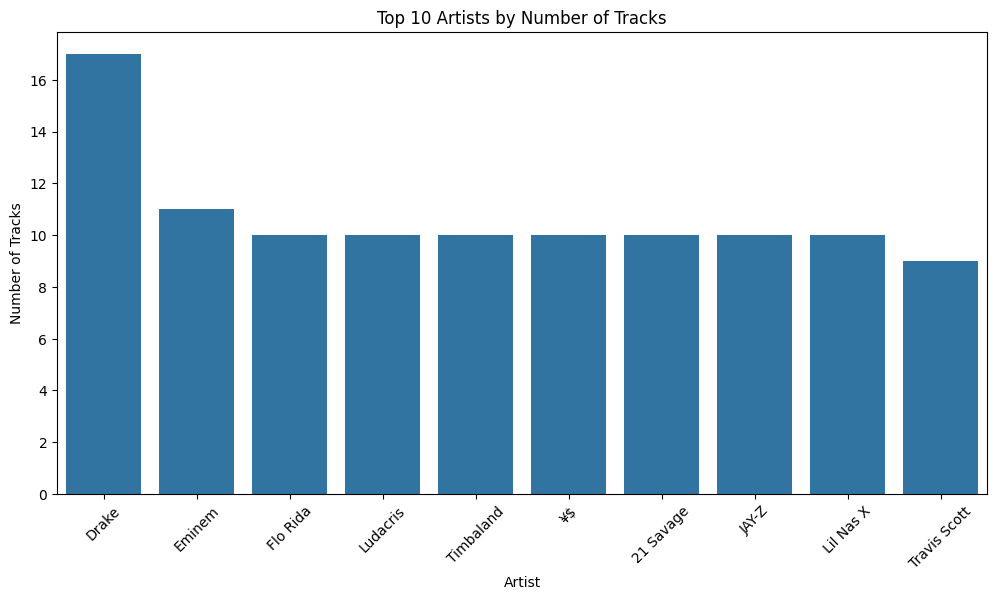




5. Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48



6. Average Popularity for Top 5 Artists (by track count):
Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64



7. Most Popular Tracks from Top Artists:
Eminem: 'Without Me' (Popularity: 90)
Drake: 'Rich Baby Daddy (feat. Sexyy Red & SZA)' (Popularity: 92)
Flo Rida: 'Low (feat. T-Pain)' (Popularity: 84)
Timbaland: 'The Way I Are' (Popularity: 85)
Ludacris: 'My Chick Bad' (Popularity: 67)



8.


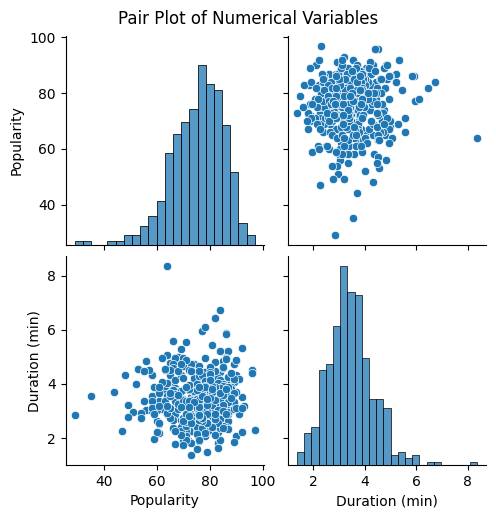




9.


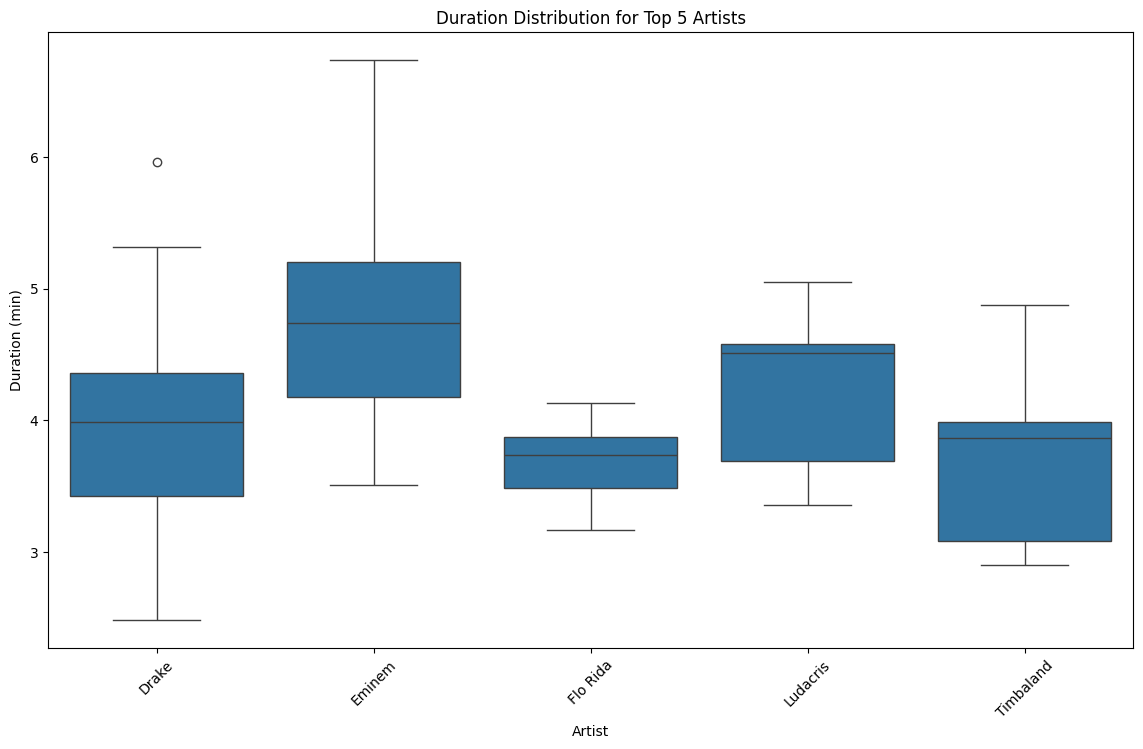




10.


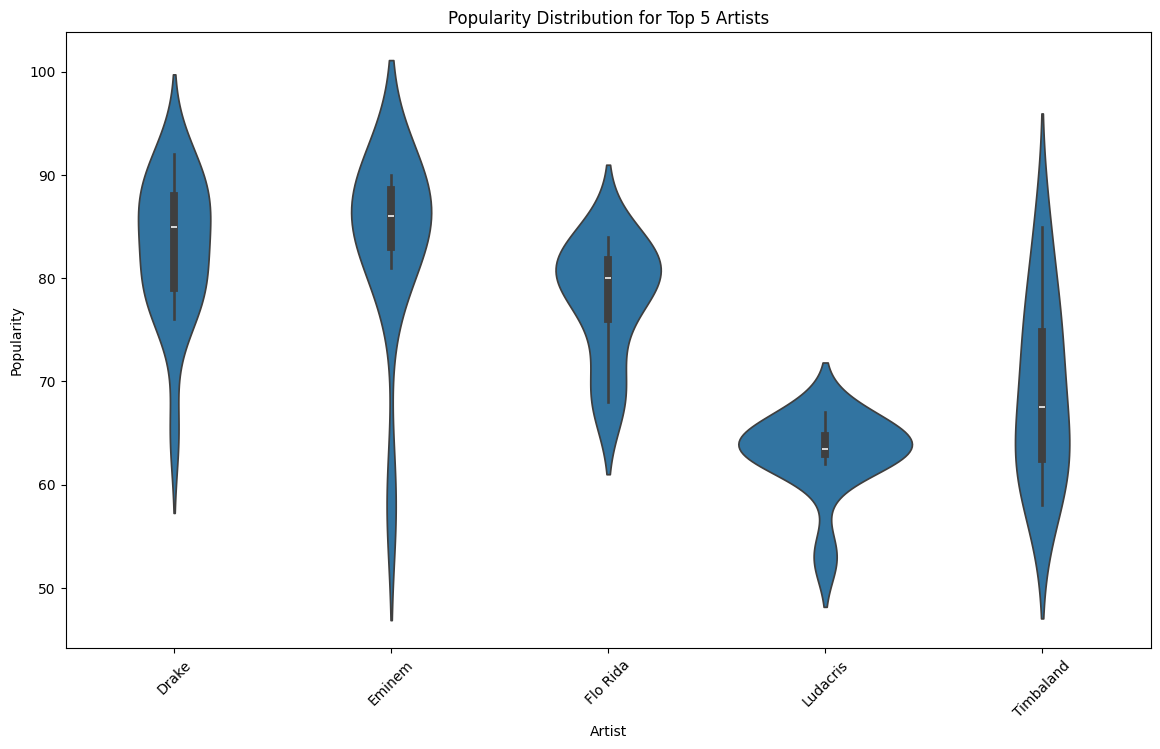

In [27]:
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')

# Converting duration to minutes
df['Duration (min)'] = df['Duration (ms)'] / 60000

# ----------------------------
# Question 2: Popularity Distribution
# ----------------------------
print("\n\n\n2.")
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

# ----------------------------
# Question 3: Popularity vs Duration
# ----------------------------
print("\n\n\n3.")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (min)', y='Popularity', data=df, alpha=0.7)
plt.title('Popularity vs Track Duration')
plt.show()

# ----------------------------
# Question 4: Artist Track Counts
# ----------------------------
print("\n\n\n4.")
top_artists = df['Artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=45)
plt.title('Top 10 Artists by Number of Tracks')
plt.ylabel('Number of Tracks')
plt.show()

# ----------------------------
# Question 5: Least Popular Tracks
# ----------------------------
least_popular = df.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
print("\n\n\n5. Top 5 Least Popular Tracks:")
print(least_popular)

# ----------------------------
# Question 6: Top Artists' Average Popularity
# ----------------------------
# Get top 5 artists by track count
top5_by_tracks = df['Artist'].value_counts().head(5).index.tolist()
avg_popularity = df[df['Artist'].isin(top5_by_tracks)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("\n\n\n6. Average Popularity for Top 5 Artists (by track count):")
print(avg_popularity)

# ----------------------------
# Question 7: Most Popular Tracks of Top Artists
# ----------------------------
print("\n\n\n7. Most Popular Tracks from Top Artists:")
for artist in avg_popularity.index:
    top_track = df[df['Artist'] == artist].sort_values('Popularity', ascending=False).iloc[0]
    print(f"{artist}: '{top_track['Track Name']}' (Popularity: {top_track['Popularity']})")

# ----------------------------
# Question 8: Pair Plot Analysis
# ----------------------------
print("\n\n\n8.")
sns.pairplot(df[['Popularity', 'Duration (min)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# ----------------------------
# Question 9: Duration Distribution by Artist
# ----------------------------
print("\n\n\n9.")
plt.figure(figsize=(14, 8))
sns.boxplot(x='Artist', y='Duration (min)', data=df[df['Artist'].isin(top_artists.head(5).index)])
plt.xticks(rotation=45)
plt.title('Duration Distribution for Top 5 Artists')
plt.show()

# ----------------------------
# Question 10: Popularity Distribution by Artist
# ----------------------------
print("\n\n\n10.")
plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_artists.head(5).index)])
plt.xticks(rotation=45)
plt.title('Popularity Distribution for Top 5 Artists')
plt.show()